# Финальный проект модуля Python
#  «Анализ данных об оптовых продажах аудиотехники»

**В финальном проекте модуля Python вам предстоит поработать аналитиком данных в компании «Карпов Саунд», которая занимается оптовой продажей аудиотехники и предлагает широкий ассортимент товаров от ведущих мировых брендов, включающий профессиональные аудиосистемы, домашние кинотеатры, портативные аудиоустройства и прочие аксессуары.** 

«Карпов Саунд» сотрудничает с крупными розничными сетями и специализированными магазинами аудиотехники в России. Клиенты компании регулярно оставляют заявки на закупку товаров в CRM системе, менеджеры связываются с клиентами, обсуждают детали, после чего заказы либо подтверждаются менеджерами, либо по разным причинам отменяются. 

В «Карпов Саунд» трепетно относятся к хранению информации о своих товарах, клиентах и заказах, однако в самый неподходящий момент хранилище данных компании оказалось временно недоступно из-за плановых работ по его оптимизации. Поэтому в рамках этого проекта все данные будут представлены не в самом удобном для анализа виде — в формате резервной выгрузки, разложенной по разным папкам на сервере компании.

Вам необходимо собрать данные из разрозненных источников, проанализировать их и сделать выводы, которые помогут руководству компании принять верные тактические решения.

**В ходе работы над проектом вам встретятся следующие таблицы:**  

1) orders (данные о заказах):  
- order_id — номер заказа  
- product_id — идентификатор товара  
- quantity — количество этого товара в заказе

2) order_status (данные о статусах заказов и клиентах):
- order_id — номер заказа  
- client_id — идентификатор клиента  
- status — статус заказа

3) products (данные о товарах):
- id — идентификатор товара  
- name — имя товара (сначала указан бренд, через запятую модель товара)  
- price — цена единицы товара, в долларах

Каждый заказ имеет статус или подтвержденного (`confirmed`), или отмененного (`canceled`). В одном заказе может быть несколько разных товаров. Если заказ был отменен, а потом создан такой же (тем же клиентом, с теми же товарами, у того же менеджера), в базе останется запись о двух заказах с разными номерами и статусами, поскольку система не позволяет создать заказ с тем же номером.

Сначала вам нужно собрать и предобработать три типа датасетов: `orders.csv`, `order_status.csv`, `products.csv`.

На схеме показано, как связаны таблицы между собой:

![](https://storage.yandexcloud.net/klms-public/production/learning-content/457/4167/37264/104636/497986/er_white.png)

Данные находятся в папке `data` из директории `shared` (`shared` -> `homeworks` -> `python_ds_miniprojects` -> `final_project`). Внутри папки `data` находятся 2 другие папки: `orders` и `products`.

В папке `orders` папки с датами, в которые сделаны записи. В этих папках — папки с именами менеджеров по продажам. Эти папки содержат файлы `orders.csv` и `order_status.csv` (в каждой папке по одной паре файлов). Пример структуры: `data` -> `orders` -> `2024-03-01` -> `Алексей Саксофонов` -> `orders.csv` и `order_status.csv`.

В папке `products` папки с категориями товаров. В этих папках файлы `products.csv` (в каждой папке по одному файлу). Пример структуры: `data` -> `products` -> `AV-процессор` -> `products.csv`.

Кроме того у вас есть файл `usd_rate.txt` с курсом доллара США на каждый день анализируемого периода (данные в формате `дата,курс,валюта`). Он потребуется в середине проекта.

В финальном проекте модуля вы можете пользоваться подсказками в ноутбуке (они менее подробные, чем были в предыдущих уроках), обращаться за помощью к экспертам в Discord и смотреть разборы в LMS (за просмотр разбора снимается половина баллов за задание).

### Соберем датасет с заказами по папкам

## Шаг 2

**Ваша первая задача — собрать данные со всех папок в три датафрейма:**  
1. `df_orders` — на основе датасетов `orders.csv` + добавьте колонку `manager` с именами менеджеров и колонку `date` с датами. 
2. `df_order_status` — на основе датасетов `order_status.csv`.  
3. `df_products` — на основе датасетов `products.csv` + добавьте колонку `category` с категориями товаров.  

**Соберите датафреймы и сохраните их в соответствующие csv файлы: `df_orders.csv`, `df_order_status.csv` и `df_products.csv`. Отправьте файлы на проверку в LMS.**

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import re
import plotly.express as px

In [2]:
os.getcwd()

'/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-savchits/Sergo'

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Импортируйте библиотеки `pandas` и `os`.  
      
2) По аналогии с кодом, который вы использовали для сбора данных в 7-м уроке про грязные данные, сделайте следующее:  
a. создайте путь к папке `data`, используя ваш логин;  
b. соберите названия нужных вам файлов (`orders.csv`, `order_status.csv`, `products.csv`) в список `target_files`;  
c. создайте пустой список `data_files`, куда будете сохранять пути к файлам;  
d. с помощью функции `os.walk()` создайте генератор;  
e. с помощью цикла пройдитесь по генератору и, если название файла совпадает с нужным вам из списка `target_files`, путь к этому файлу добавьте в список `data_files`.
      
3) Используя пути к файлам из списка `data_files`, соберите полные датафреймы `df_orders`, `df_order_status` и `df_products`:  
a. создайте пустые списки `orders_df_list`, `order_status_df_list` и `products_df_list`, чтобы в них сложить данные для соответствующих датафреймов;  
b. с помощью цикла пройдитесь по путям в списке `data_files` и прочитайте датафрейм по этому пути. Добавьте датафрейм в тот или иной список в зависимости от того, название какого датасета содержит путь. Если в названии пути есть `orders.csv`, перед добавлением в список создайте колонки `manager` с именами менеджеров и `date` с датами. А если в названии пути есть `products.csv`, перед добавлением в список создайте колонку `category` с категориями товаров. Для создания колонок используйте подстроки из строки с путем.  
      
4) Каждый раз используя функцию `pd.concat` с параметром `ignore_index=True`, соберите данные в датафреймы: из списка `orders_df_list` в датафрейм `df_orders`, из списка `order_status_df_list` — в датафрейм `df_order_status`, а из списка `products_df_list` - в датафрейм `df_products`.
      
5) Проверьте размер каждого датафрейма и убедитесь, что:
- `df_orders` имеет размер (4603, 5)
- `df_order_status` — (346, 3)
- `df_products` — (1677, 4)
      
6) Сохраните каждый датафрейм в соответствующий csv файл, задав его название как строку и параметр `index=False`.
      
7) По одному скачайте получившиеся csv файлы из той же папки в JupyterHub, где находится ноутбук, в котором вы пишете этот код.

      
</p>
</details>

In [3]:
# Задаем переменную data_folder, содержащую путь к директории data_folder в файловой    системе
data_folder= '/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-savchits/shared/homeworks/python_ds_miniprojects/final_project/data/orders'

# Создаём пустой список file_paths, в который будут добавляться пути к файлам.
file_paths = []
# Запускаем цикл for cовместно с методом os.walk() по папке data_folder
# В переменной path находится текущий путь (папка data_folder), dirs — список подпапок в текущей папке, files — список файлов в них
for path, dirs, files in os.walk(data_folder):
		# Вложенный цикл для перебора файлов в текущей папке
    for file in files:
		    # Проверка формата файла — текстовый файл должен заканчиваться на '.txt'
        if file.endswith('orders.csv'):
		        # Построение полного пути к файлу с помощью os.path.join(), объединяя       текущий путь path и имя файла file
            file_path = os.path.join(path, file)
            # Добавляем получившийся путь в список
            file_paths.append(file_path)


### Посмотрим на общую динамику заказов и определим дни, которые выбиваются из общей картины

In [4]:
df_orders = pd.read_csv(file_paths[0])

In [5]:
df_orders['manager'] = file_paths[0].split('/')[-2]
df_orders['date'] = file_paths[0].split('/')[-3]

In [6]:
for file in file_paths[1:]:
    df_1 = pd.read_csv(file)
    df_1['manager'] = file.split('/')[-2]
    df_1['date'] = file.split('/')[-3]
    df = pd.concat([df_orders, df_1])
    df_orders = df

In [7]:
df_orders.to_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-savchits/Sergo/df_orders.csv', index=False)

In [8]:
df_orders['date'] = pd.to_datetime(df_orders['date'], format='%Y-%m-%d')

In [9]:
# Задаем переменную data_folder, содержащую путь к директории data_folder в файловой    системе
data_folder= '/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-savchits/shared/homeworks/python_ds_miniprojects/final_project/data/orders'

# Создаём пустой список file_paths, в который будут добавляться пути к файлам.
file_paths_1 = []
# Запускаем цикл for cовместно с методом os.walk() по папке data_folder
# В переменной path находится текущий путь (папка data_folder), dirs — список подпапок в текущей папке, files — список файлов в них
for path, dirs, files in os.walk(data_folder):
		# Вложенный цикл для перебора файлов в текущей папке
    for file in files:
		    # Проверка формата файла — текстовый файл должен заканчиваться на '.txt'
        if file.endswith('order_status.csv'):
		        # Построение полного пути к файлу с помощью os.path.join(), объединяя       текущий путь path и имя файла file
            file_path = os.path.join(path, file)
            # Добавляем получившийся путь в список
            file_paths_1.append(file_path)

In [10]:
df_order_status = pd.read_csv(file_paths_1[0])

In [11]:
for file in file_paths_1[1:]:
    df_2 = pd.read_csv(file)
    df = pd.concat([df_order_status, df_2])
    df_order_status = df

In [12]:
df_order_status.to_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-savchits/Sergo/df_order_status.csv', index=False)

In [13]:
data_folder= '/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-savchits/shared/homeworks/python_ds_miniprojects/final_project/data/products'

# Создаём пустой список file_paths, в который будут добавляться пути к файлам.
file_paths_2 = []
# Запускаем цикл for cовместно с методом os.walk() по папке data_folder
# В переменной path находится текущий путь (папка data_folder), dirs — список подпапок в текущей папке, files — список файлов в них
for path, dirs, files in os.walk(data_folder):
		# Вложенный цикл для перебора файлов в текущей папке
    for file in files:
		    # Проверка формата файла — текстовый файл должен заканчиваться на '.txt'
        if file.endswith('products.csv'):
		        # Построение полного пути к файлу с помощью os.path.join(), объединяя       текущий путь path и имя файла file
            file_path = os.path.join(path, file)
            # Добавляем получившийся путь в список
            file_paths_2.append(file_path)

In [14]:
df_products = pd.read_csv(file_paths_2[0])
df_products

,id,name,price
0,207,"Denon, AVR-S540BT",243.52
1,208,"Denon, AVR-X3700H",1305.52
2,209,"Denon, AVR-X4700H",1620.21
3,210,"Denon, AVR-X6700H",2050.31
4,211,"Denon, AVC-X4700H",1496.81
...,...,...,...
65,1581,"Yamaha, RX-A680",552.41
66,1582,"Yamaha, RX-V485",420.66
67,1583,"Yamaha, RX-V4A",534.99
68,1584,"Yamaha, RX-V6A",860.83


In [15]:
df_products['category'] = file_paths_2[0].split('/')[-2]

In [16]:
for file in file_paths_2[1:]:
    df_3 = pd.read_csv(file)
    df_3['category'] = file.split('/')[-2]
    df = pd.concat([df_products, df_3])
    df_products = df

In [17]:
df_products.to_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-savchits/Sergo/df_products.csv', index=False)

In [18]:
df_products

,id,name,price,category
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер
...,...,...,...,...
134,1592,"Yamaha, YH-L700A",425.72,Беспроводные наушники
135,1593,"Yamaha, HPH-MT8",267.38,Беспроводные наушники
136,1594,"Yamaha, TW-E5A",170.30,Беспроводные наушники
137,1595,"Yamaha, YH-E500A",222.75,Беспроводные наушники


## Шаг 3

Посчитайте количество заказов в каждый день. **Определите день с наибольшим числом заказов.** Укажите этот день в том формате, в котором он представлен в данных (гггг-мм-дд).

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Переведите колонку `date` в тип `datetime`.
      
2) Сгруппируйте данные по дате и посчитайте число уникальных заказов. Получившуюся колонку с числом заказов можете переименовать в `orders`.
      
3) Отсортируйте данные по убыванию числа заказов и возьмите дату из верхней строчки.
      
</p>
</details>

In [19]:
# Ваш код здесь
df_barplot = df_orders.date.value_counts().reset_index()
df_barplot

,index,date
0,2024-03-14,437
1,2024-03-13,339
2,2024-03-01,302
3,2024-03-29,241
4,2024-03-26,231
5,2024-03-15,225
6,2024-03-05,222
7,2024-03-20,222
8,2024-03-06,221
9,2024-03-27,203


## Шаг 4

**Постройте график с количеством заказов по дням и определите, заметна ли в данных сезонность.**

- Да, по выходным заказов намного больше, чем в остальные дни  
- Да, по выходным почти нет заказов  
- Да, по понедельникам заказов всегда больше, чем в остальные дни недели  
- Да, по понедельникам заказов всегда меньше, чем в остальные дни недели  
- Нет, в данных сложно обнаружить какие-то закономерности  

In [20]:
df_barplot = df_barplot.rename(columns={'date': 'orders'})
df_barplot = df_barplot.rename(columns={'index': 'date'})
df_barplot


,date,orders
0,2024-03-14,437
1,2024-03-13,339
2,2024-03-01,302
3,2024-03-29,241
4,2024-03-26,231
5,2024-03-15,225
6,2024-03-05,222
7,2024-03-20,222
8,2024-03-06,221
9,2024-03-27,203


In [21]:
df_barplot.date = df_barplot.date.dt.day_name()

In [22]:
df_barplot

,date,orders
0,Thursday,437
1,Wednesday,339
2,Friday,302
3,Friday,241
4,Tuesday,231
5,Friday,225
6,Tuesday,222
7,Wednesday,222
8,Wednesday,221
9,Wednesday,203


<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Импортируйте библиотеку `seaborn` и модуль `pyplot` из библиотеки `matplotlib`.
      
2) Чтобы все графики в ноутбуке имели одинаковое форматирование, можете установить общие настройки через `sns.set()`.
      
3) Постройте линейный график, где по оси `х` будут идти даты, а по оси `у` — количество заказов. Если метки с датами наползают друг на друга, поверните их под углом 45 градусов.
      
</p>
</details>

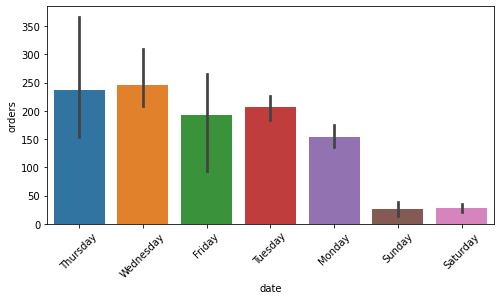

In [23]:
# Ваш код здесь
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=df_barplot, x='date', y='orders')
ax.tick_params(axis='x', labelrotation=45)

## Шаг 5

**Кажется, в данных помимо дня с наибольшим числом заказов есть еще один день, который выбивается из общей картины.** Что это за день:  
- Это воскресенье, в которое было много заказов?  
- Это понедельник, в который было много заказов?  
- Это пятница, в которую было мало заказов?  
- Это праздничный день, в который было мало заказов?

Подумайте, почему так вышло? Укажите этот день в том формате, в котором он представлен в данных (гггг-мм-дд)

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Проверьте каждый из четырех предложенных поинтов: есть ли дни, соответствующие одному или нескольким поинтам? Посмотрите на график или на значения в датафрейме с количеством заказов по дням.
      
</p>
</details>

## Шаг 6

К вам пришел радостный руководитель отдела продаж и попросил выяснить причину, почему заказы в один из дней резко подскочили, чтобы и дальше увеличивать продажи.

Возможно, в день с наибольшим числом заказов (который вы определили на третьем шаге) отдел маркетинга запустил какую-то акцию? Или менеджеры стали активнее предлагать компаниям оформить заказ? Нужно подробнее изучить этот день. Начнем со статусов заказа.

**Добавьте к данным о заказах информацию об их статусах. Общий датафрейм назовите `orders_status`. Сохраните получившийся датафрейм в csv файл `orders_status.csv` (при сохранении используйте параметр `index=False`) и отправьте этот csv файл на проверку в LMS.**

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Объедините датафреймы `df_orders` и `df_order_status` в новый `orders_status`.
      
2) Можете вывести первые строчки нового датафрейма и посмотреть его размер, чтобы убедиться, что объединение прошло корректно.
      
3) Сохраните датафрейм в csv файл с помощью метода, задав его название как строку `orders_status.csv` и параметр `index=False`.
      
4) Скачайте получившийся csv файл из той же папки в JupyterHub, где находится ноутбук, в котором вы пишете этот код. 
      
</p>
</details>

In [24]:
# Ваш код здесь
orders_status = df_orders.merge(df_order_status, on='order_id')


In [25]:
orders_status.to_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-savchits/Sergo/orders_status.csv', index=False)

## Шаг 7

Посмотрите на количество и соотношение подтвержденных и отмененных заказов. **В ответе укажите долю отмененных заказов.** Ответ округлите до двух знаков после точки.

In [26]:
orders_status.status.value_counts(normalize=True).round(2)

confirmed    0.89
canceled     0.11
Name: status, dtype: float64

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Чтобы оставить в данных только информацию о том, был заказ подтвержден или отменен, выберите из датафрейма `orders_status` колонки с номером заказа и статусом, а затем удалите дубликаты (НЕ сохраняйте результат в тот же датафрейм, потому что `orders_status` в полном виде понадобится для решения следующих заданий).

2) Посчитайте частоту, с которой встречается каждый из статусов в оставшихся данных.

3) Посчитайте долю каждого из статусов. Значения округлите до 2 знаков после точки.

      
</p>
</details>

In [27]:
# Ваш код здесь
round(orders_status.status.value_counts()[1] / (orders_status.status.value_counts()[0] + orders_status.status.value_counts()[1]) , 2)


0.11

## Шаг 8

**Посчитайте количество подтвержденных и отмененных заказов на каждую дату.** Определите, в какой день не было ни одного подтвержденного заказа. Для этого сделайте сводную таблицу, где в строках будут даты, в колонках — стутасы заказов, а значения — число заказов с этим статусом в определенную дату. Пропуски заполните нулями.  

**В ответ укажите день, когда не было ни одного подтвержденного заказа.** Дату укажите в том формате, в котором она представлена в данных (гггг-мм-дд).

In [28]:
 df = orders_status.groupby(['date', 'status'], as_index=False).agg({'order_id': 'count'})

In [29]:
df.head()

,date,status,order_id
0,2024-03-01,canceled,29
1,2024-03-01,confirmed,273
2,2024-03-02,confirmed,30
3,2024-03-03,confirmed,8
4,2024-03-04,confirmed,143


In [30]:
df.date = df.date.dt.strftime('%Y-%m-%d')

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Данные в датафрейме `orders_status` сгруппируйте по дате и статусу, посчитайте количество уникальных заказов для каждой группы. Получившуюся колонку с числом заказов можете переименовать в `orders`.
      
2) Разверните получившийся датафрейм так, чтобы получилась сводная таблица, где в индексе — даты, в колонках — статусы, а в значениях — количество заказов. 
      
3) Пропуски заполните нулями.
      
4) Из-за того, что после разворота таблицы в колонках `canceled` и `confirmed` появились пропущенные значения, тип данных в этих колонках стал `float`. Но число заказов не может быть дробным, поэтому приведите эти колонки к типу `int`.
      
5) Отфильтруйте строки, где значение в колонке `confirmed` равно нулю.
      
</p>
</details>

In [31]:
# Ваш код здесь
data_status = pd.pivot_table(df,
               index=['date'],
               columns=['status'],
               values=['order_id'],
               ).fillna(0)


In [32]:
data_status = data_status.reset_index()


In [33]:
data_status

date order_id          
status             canceled confirmed
0       2024-03-01     29.0     273.0
1       2024-03-02      0.0      30.0
2       2024-03-03      0.0       8.0
3       2024-03-04      0.0     143.0
4       2024-03-05      0.0     222.0
5       2024-03-06     12.0     209.0
6       2024-03-07      5.0     196.0
7       2024-03-08      0.0       5.0
8       2024-03-09     18.0       0.0
9       2024-03-10     12.0      23.0
10      2024-03-11     17.0     168.0
11      2024-03-12     31.0     172.0
12      2024-03-13    263.0      76.0
13      2024-03-14      0.0     437.0
14      2024-03-15     16.0     209.0
15      2024-03-16      0.0      26.0
16      2024-03-17      0.0      43.0
17      2024-03-18      0.0     159.0
18      2024-03-19     22.0     150.0
19      2024-03-20     37.0     185.0
20      2024-03-21     31.0     121.0
21      2024-03-22      0.0     191.0
22      2024-03-23      0.0      42.0
23      2024-03-24      0.0      33.0
24      2024-03-25     13.0     116.0
25      2024-03-26     14.0     217.0
26      2024-03-27      0.0     203.0
27      2024-03-28      0.0     155.0
28      2024-03-29      0.0     241.0
29      2024-03-30      0.0      20.0
30      2024-03-31      0.0      10.0

## Шаг 9

**Постройте график с заказами по дням в разбивке по статусу заказа.** Посмотрим подробнее на день с наибольшим числом заказов (вместе и подтвержденных, и отменных), который мы определили ранее, и на день, предшествующий ему. Какой вывод можно сделать? Выберите один или несколько вариантов:

- В день с наибольшим числом заказов было очень много отмен  
- В день с наибольшим числом заказов было много успешно оформленных заказов  
- В день, предшествующий дню с наибольшим числом заказов, было много отмен  
- В день, предшествующий дню с наибольшим числом заказов, было много успешно оформленных заказов  
- В день, предшествующий дню с наибольшим числом заказов, не было ни одного успешно оформленного заказа  
- В день, предшествующий дню с наибольшим числом заказов, не было ни одного отмененного заказа

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Постройте линейный график, где по оси `х` будут идти даты, по оси `у` — количество заказов, а цвета линий будут определены статусами заказов. Если метки с датами наползают друг на друга, поверните их под углом 45 градусов.

</p>
</details>

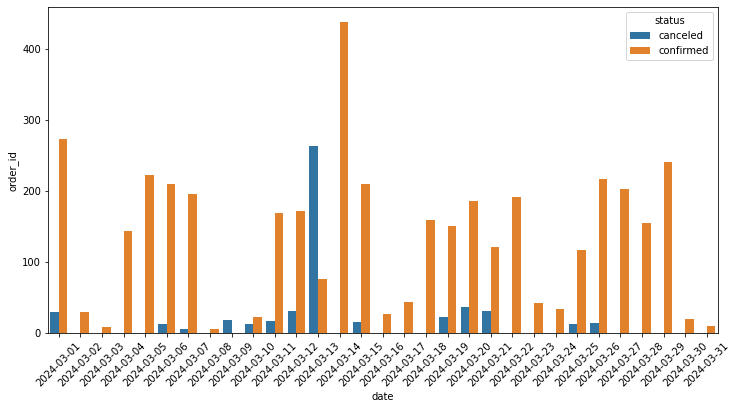

In [34]:
# Ваш код здесь
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data = df, x='date', y='order_id', hue='status')
ax.tick_params(axis='x', labelrotation=45)

Рассмотрим эти два дня отдельно (день с наибольшим числом заказов, который мы определили ранее, и день, предшествующий ему). Проанализируйте заказы за эти дни и ответьте, какую из этих гипотез можно назвать наиболее правдоподобной.

- Так сложилось, что один день оказался крайне неудачным для отдела продаж, все клиенты отменили свои заказы. А на следующий день отдел продаж пытался компенсировать отсутствие продаж в предыдущий и перевыполнил дневной план. Почти все заказы не повторяют вчерашние  
- Произошел сбой в работе CRM системы, который не позволил клиентам подтвердить заказ. В результате все созданные в первый день заказы автоматически отменились, поэтому клиентам пришлось оформлять их повторно на следующий день. Почти половина заказов повторяет вчерашние

Как можно определить, что заказ повторяет вчерашний? У заказов будут совпадать сразу несколько параметров: клиент, менеджер, количество уникальных товаров в заказе и общее число товаров в штуках. Но номера заказов будут разными.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Отберите все отмененные заказы 13 марта и для каждого заказа агрегируйте данные: посчитайте количество уникальных товаров в нем, сумму единиц всех товаров, а также возьмите менеджера и клиента (примените к соответствующим колонкам функции `max`).
      
2) Отберите все подтвержденные заказы 14 марта и для каждого заказа агрегируйте данные: посчитайте количество уникальных товаров в нем, сумму единиц всех товаров, а также возьмите менеджера и клиента (примените к соответствующим колонкам функции `max`).
      
3) Объедините эти датафреймы с заказами по совпадающим характеристикам: имя менеджера, id клиента, число уникальных товаров в заказе и общее число товаров в штуках. Так у вас получатся те заказы, которые отменили в первый день и оформили заново на следующий.
      
4) Посчитайте число строк в датафрейме с заказами, которые отменили в первый день и оформили заново на следующий. Разделите это число на число строк в датафрейме с подтвержденными заказами 14 марта. Так вы узнаете долю заказов, которые повторяют вчерашние.
      
</p>
</details>

In [35]:
df_1 = orders_status.query('date == "2024-03-13" and status == "canceled"') \
    .groupby(['order_id', 'manager', 'client_id'], as_index=False) \
    .agg({'product_id': pd.Series.nunique, 'quantity': 'sum'})

In [36]:
df_2 = orders_status.query('date == "2024-03-14" and status == "confirmed"') \
    .groupby(['order_id', 'manager', 'client_id'], as_index=False) \
    .agg({'product_id': pd.Series.nunique, 'quantity': 'sum'})

In [37]:
df_1.merge(df_2, on=['manager', 'client_id', 'product_id', 'quantity'])

,order_id_x,manager,client_id,product_id,quantity,order_id_y
0,AFIH-00611801,Алексей Саксофонов,43,11,192,FDEB-71487438
1,BBFJ-27674101,Ксения Балалайкина,73,14,294,UETB-44283966
2,CLBQ-63032648,Виктор Тромбонов,60,13,205,IECD-18739530
3,CYJY-07359557,Екатерина Тарелкина,56,13,316,WNMY-98871151
4,GHGB-88045656,Ксения Балалайкина,7,4,42,JUGG-73806170
5,JEIF-69283221,Виктор Тромбонов,94,15,207,EPBF-14743479
6,JQQO-28609300,Виктор Тромбонов,93,15,252,OWZC-14247946
7,KJJS-03491897,Алексей Саксофонов,66,18,399,GRCH-73394464
8,MIGZ-68487439,Алексей Саксофонов,51,17,325,BCMM-97072924
9,NBIO-35476164,Виктор Тромбонов,95,14,319,NFML-87752700


In [38]:
16 / 34

0.47058823529411764

### Посчитаем ключевые метрики, посмотрим на их динамику и составим небольшой отчет

## Шаг 11

**У вас есть данные за целый месяц, поэтому пора посчитать ключевые метрики этого месяца.** Но вот незадача - в ваших данных цена единицы товара указана в долларах США, потому что закупаете их в долларах, но продаете товары за российские рубли (по тому курсу, который установил Центробанк на дату продажи), а значит и метрики требуется посчитать в рублях. Хорошо, что у вас есть текстовый файл с курсом доллара США на каждую дату. **Откройте файл `usd_rate.txt`, соберите из него датафрейм с 2 колонками: `date` и `currency_rate`. Посчитайте среднее значение курса доллара за месяц.** Результат округлите до двух знаков после точки.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Откройте файл `usd_rate.txt` с помощью контекстного менеджера `with` и функции `open()`. Список строк сохраните в переменную `currency`.
      
2) С помощью функции `pd.DataFrame(columns=['col_name'])` создайте из списка датафрейм с любым названием единственной колонки.
      
3) На основе имеющейся колонки создайте колонки `date` и `currency_rate`, куда положите соответствующие данные. Для этого разделите общую строку со всеми данными и возьмите нужные данные по индексу.
      
4) Переведите колонку `date` в тип `datetime`.
      
5) Удалите из датафрейма ненужную колонку с общими данными.
      
6) Посчитайте среднее значение курса доллара за месяц.
      
7) Результат округлите до двух знаков после точки.   
      
</p>
</details>

In [39]:
# Ваш код здесь
usd_rate = open('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-savchits/Sergo/usd_rate.txt').readlines()


In [40]:
data_to_dataframe = [[usd.split(',')[0], usd.split(',')[1]] for usd in usd_rate]

In [41]:
currency_rate_data = pd.DataFrame(data_to_dataframe, columns=['date', 'currency_rate'])

In [42]:
currency_rate_data.astype({'currency_rate': 'float'}).describe().round(2)

,currency_rate
count,31.00
mean,91.70
std,0.75
min,90.34
25%,91.02
50%,91.87
75%,92.37
max,92.78


In [43]:
currency_rate_data.currency_rate = currency_rate_data.currency_rate.astype(float)

## Шаг 12

**Работу с ключевыми метриками начните с подсчета общей выручки.** Данные по товарам в подтвержденных заказах у вас есть в датафрейме `orders_status`, а стоимость одной единицы товара можно взять из датафрейма `df_products`. Объедините эти датафреймы в общий `df_full`, добавьте к ним информацию по курсу доллара на каждую дату. Создайте колонку с выручкой для каждого товара в заказах и посчитайте, **чему равна общая выручка в рублях?** Учитывайте только подтвержденные заказы. Результат округлите до двух знаков после точки.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Присоедините к датафрейму `orders_status` датафрейм `df_products`, указав, что ключом в левом датафрейме будет являться колонка `product_id` (параметр `left_on`), а в правом — колонка `id` (параметр `right_on`). Новый датафрейм сохраните в `df_full`.
      
2) К датафрейму `df_full` добавьте информацию о курсе доллара на каждую дату, присоединив датафрейм `df_currency` по общей колонке с датой.
      
3) Создайте колонку `price_rub` с ценами в рублях. Для этого умножьте значения в колонке `price` с ценами на значения в колонке `currency_rate` с курсом валюты.
      
4) Создайте колонку `revenue` с выручкой, умножив колонку со стоимостью единицы товара в рублях на колонку с количеством товара.
      
5) Отберите только записи с подтвержденными заказами и сохраните результат в датафрейм `df_confirmed`, он вам ещё пригодится.
      
6) Суммируйте значения в колонке `revenue` и округлите результат до двух знаков после точки.
      
</p>
</details>

In [44]:
df_products = df_products.rename(columns={'id': 'product_id'})

In [45]:
df_products

,product_id,name,price,category
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер
...,...,...,...,...
134,1592,"Yamaha, YH-L700A",425.72,Беспроводные наушники
135,1593,"Yamaha, HPH-MT8",267.38,Беспроводные наушники
136,1594,"Yamaha, TW-E5A",170.30,Беспроводные наушники
137,1595,"Yamaha, YH-E500A",222.75,Беспроводные наушники


In [46]:
currency_rate_data.date = pd.to_datetime(currency_rate_data.date)

In [47]:
df_full = orders_status.merge(df_products, on='product_id')


In [48]:
df_full

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика
1,YQDE-00869611,489,10,Алексей Саксофонов,2024-03-12,20,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика
2,KBOO-97036112,489,18,Алексей Саксофонов,2024-03-19,24,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика
3,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,"JBL, Control 28-1",301.85,Настенная акустика
4,PZUZ-70017989,594,18,Надежда Гармошкина,2024-03-01,33,confirmed,"JBL, Control 28-1",301.85,Настенная акустика
...,...,...,...,...,...,...,...,...,...,...
4598,EQIU-00464768,335,9,Виктор Тромбонов,2024-03-26,30,confirmed,"Electrohome, Karaoke Machine",176.59,Система караоке
4599,EQIU-00464768,822,7,Виктор Тромбонов,2024-03-26,30,confirmed,"LG, LHD457",172.20,Домашний кинотеатр
4600,IZFC-94335845,1568,38,Максим Барабанов,2024-03-26,56,confirmed,"Xiaomi, Mi Smart Display",83.56,Умная колонка
4601,CUDB-19668701,1333,22,Маргарита Камертонова,2024-03-26,82,confirmed,"Sennheiser, HD 450BT",129.99,Беспроводные наушники


In [49]:
new_df = df_full.merge(currency_rate_data, on='date').query('status == "confirmed"')

In [50]:
new_df

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category,currency_rate
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,"JBL, Control 28-1",301.85,Настенная акустика,90.7493
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493
...,...,...,...,...,...,...,...,...,...,...,...
4598,YHMP-64962628,564,40,Маргарита Камертонова,2024-03-03,44,confirmed,"JBL, Tune 510BT",45.38,Беспроводные наушники,91.3336
4599,YHMP-64962628,486,17,Маргарита Камертонова,2024-03-03,44,confirmed,"Heco, Ambient 22F",185.50,Настенная акустика,91.3336
4600,YHMP-64962628,832,28,Маргарита Камертонова,2024-03-03,44,confirmed,"LG, SK1",86.56,Саундбар,91.3336
4601,YHMP-64962628,254,10,Маргарита Камертонова,2024-03-03,44,confirmed,"Edifier, R1280T",86.99,Активные колонки,91.3336


In [51]:
new_df['total'] = new_df.quantity * new_df.price * new_df.currency_rate

In [52]:
new_df

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category,currency_rate,total
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,2.902290e+05
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,1.643561e+05
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,1.176358e+06
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,6.725068e+04
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,8.705580e+04
...,...,...,...,...,...,...,...,...,...,...,...,...
4598,YHMP-64962628,564,40,Маргарита Камертонова,2024-03-03,44,confirmed,"JBL, Tune 510BT",45.38,Беспроводные наушники,91.3336,1.657888e+05
4599,YHMP-64962628,486,17,Маргарита Камертонова,2024-03-03,44,confirmed,"Heco, Ambient 22F",185.50,Настенная акустика,91.3336,2.880205e+05
4600,YHMP-64962628,832,28,Маргарита Камертонова,2024-03-03,44,confirmed,"LG, SK1",86.56,Саундбар,91.3336,2.213634e+05
4601,YHMP-64962628,254,10,Маргарита Камертонова,2024-03-03,44,confirmed,"Edifier, R1280T",86.99,Активные колонки,91.3336,7.945110e+04


In [53]:
new_df.total.sum().round(2)

2038231821.56

## Шаг 13

**Следующая метрика, которую вам нужно посчитать — средний чек в этом месяце (в рублях).** Разделите общую выручку на количество заказов. Результат округлите до двух знаков после точки.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Посчитайте число уникальных подтвержденных заказов.

2) Разделите сумму выручки, посчитанную на прошлом шаге (без округления), на это число.

3) Результат округлите до двух знаков после точки.  
      
</p>
</details>

In [54]:
# Ваш код здесь
round(new_df.total.sum() / new_df.order_id.nunique(), 2)


6596219.49

## Шаг 14

Ключевые метрики месяца вы посчитали, теперь попробуйте посмотреть на их динамику внутри месяца: посчитайте выручку, средний чек и число заказов — на каждый день. Посмотрите на графики и выберите верные ответы:

- число заказов и выручка каждый день изменяются в одинаковом направлении (если в этот день число заказов выросло, то и выручка выросла; число заказов упало — в этот же день упала и выручка)  
- число заказов и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день число заказов выросло, то выручка может упасть, и наоборот: число заказов упало — в этот же день выручка выросла)  
- средний чек и выручка каждый день изменяются в одинаковом направлении (если в этот день средний чек вырос, то и выручка выросла; средний чек упал — в этот же день упала и выручка)  
- средний чек и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день средний чек вырос, то выручка может упасть, и наоборот: средний чек упал — в этот же день выручка выросла)  
- в день с наибольшим числом заказов и выручка, и средний чек также показывают максимальное значение  
- в день с наибольшим числом заказов выручка и/или средний чек не показывают максимальное значение  
- с течением времени выручка то увеличивается, то уменьшается  
- с течением времени выручка только увеличивается  
- на протяжении всего месяца средний чек то увеличивается, то уменьшается  
- средний чек на протяжении всего месяца имеет одинаковое значение

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Сгруппируйте датафрейм `df_confirmed` с подтвержденными заказами по дате и посчитайте на каждую дату число ункальных заказов и выручку. Результат сохраните в датафрейм `df_report_by_date`. Получившуюся колонку с числом заказов можете переименовать в `orders`. 
      
2) Создайте колонку со значением среднего чека в каждую дату, для этого разделите значения в колонке с выручкой на значения в колонке с числом заказов. Результат округлите до двух знаков после точки
      
3) Постройте три линейных графика, один под другим (в одной ячейке или в разных)
      
</p>
</details>

In [55]:
# Ваш код здесь
average_chek_today = new_df.groupby('date', as_index=False).agg({'total': 'sum', 'order_id': pd.Series.nunique}) 


In [56]:
average_chek_today['average_chek'] = average_chek_today.total / average_chek_today.order_id

In [57]:
average_chek_today

,date,total,order_id,average_chek
0,2024-03-01,1.554118e+08,20,7.770588e+06
1,2024-03-02,1.197167e+07,2,5.985834e+06
2,2024-03-03,2.548418e+06,1,2.548418e+06
3,2024-03-04,6.404993e+07,10,6.404993e+06
4,2024-03-05,8.952724e+07,18,4.973735e+06
5,2024-03-06,1.107687e+08,13,8.520669e+06
6,2024-03-07,9.102331e+07,13,7.001793e+06
7,2024-03-08,1.609147e+06,1,1.609147e+06
8,2024-03-10,8.929309e+06,2,4.464655e+06
9,2024-03-11,8.910847e+07,11,8.100770e+06


In [58]:
average_chek_today.date = average_chek_today.date.dt.strftime('%Y-%m-%d')

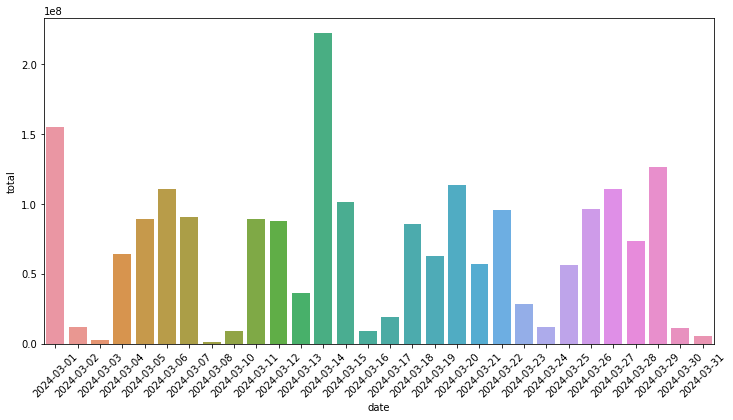

In [59]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data = average_chek_today[['date', 'total']], x='date', y='total')
ax.tick_params(axis='x', labelrotation=45)

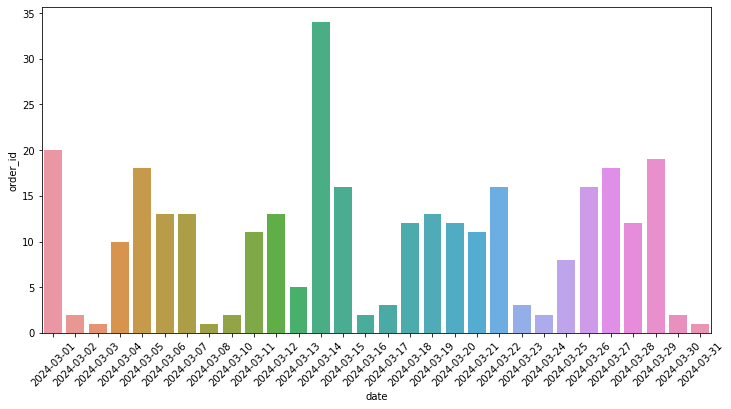

In [60]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data = average_chek_today[['date', 'order_id']], x='date', y='order_id')
ax.tick_params(axis='x', labelrotation=45)

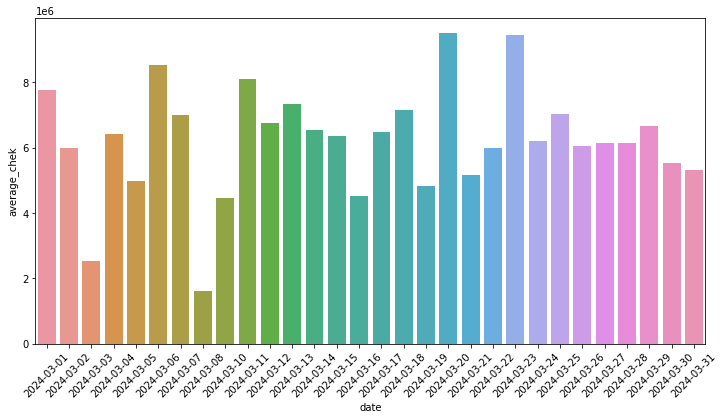

In [61]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data = average_chek_today[['date', 'average_chek']], x='date', y='average_chek')
ax.tick_params(axis='x', labelrotation=45)

### Проанализируем интерес клиентов к брендам

## Шаг 15

К вам снова обратился руководитель отдела продаж. Он хочет разобраться, какие бренды востребованы среди клиентов, а какие — нет. На основе данных о названиях товаров в датафрейме `df_full` создайте новую колонку `brand`, где будет только название бренда. **Посчитайте, сколькими брендами интересовались клиенты** (статус заказа здесь не важен, если запись о бренде попала в данные о заказах, значит клиент заказал или хотел заказать товар этого бренда).

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) В датафрейме `df_full` создайте новую колонку `brand`, в которую поместите только названия брендов. Для этого разделите значения в колонке name и возьмите первое из них (сначала идет бренд и через запятую модель товара).

2) Посчитайте количество уникальных значений в колонке `brand`.
      
</p>
</details>

In [62]:
# Ваш код здесь
df_full.head()


,order_id,product_id,quantity,manager,date,client_id,status,name,price,category
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика
1,YQDE-00869611,489,10,Алексей Саксофонов,2024-03-12,20,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика
2,KBOO-97036112,489,18,Алексей Саксофонов,2024-03-19,24,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика
3,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,"JBL, Control 28-1",301.85,Настенная акустика
4,PZUZ-70017989,594,18,Надежда Гармошкина,2024-03-01,33,confirmed,"JBL, Control 28-1",301.85,Настенная акустика


In [63]:
df_full['brand'] = df_full.name.apply(lambda x: x.split(',')[0])

In [64]:
df_full.brand.nunique()

121

## Шаг 16

Посчитайте, какую выручку принес каждый бренд и в скольких подтвержденных заказах были товары этого бренда. **Определите, какой бренд принес наибольшую выручку.** В ответ укажите его название.

Дополнительно: проверьте, именно этот бренд встречается в большем количестве заказов, чем другие бренды? Или может его реже заказывают, но на более крупные суммы?

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Отберите в датафрейме `df_full` только подтвержденные заказы.

2) Сгруппируйте данные по брендам и посчитайте выручку и количество уникальных заказов.

3) Отсортируйте агрегированные данные по убыванию выручки и посмотрите бренд в верхней строчке.

4) Дополнительно: отсортируйте агрегированные данные по убыванию количество заказов и посмотрите бренд в верхней строчке.

</p>
</details>

In [65]:
# Ваш код здесь
df_full


,order_id,product_id,quantity,manager,date,client_id,status,name,price,category,brand
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика,Heco
1,YQDE-00869611,489,10,Алексей Саксофонов,2024-03-12,20,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика,Heco
2,KBOO-97036112,489,18,Алексей Саксофонов,2024-03-19,24,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика,Heco
3,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,"JBL, Control 28-1",301.85,Настенная акустика,JBL
4,PZUZ-70017989,594,18,Надежда Гармошкина,2024-03-01,33,confirmed,"JBL, Control 28-1",301.85,Настенная акустика,JBL
...,...,...,...,...,...,...,...,...,...,...,...
4598,EQIU-00464768,335,9,Виктор Тромбонов,2024-03-26,30,confirmed,"Electrohome, Karaoke Machine",176.59,Система караоке,Electrohome
4599,EQIU-00464768,822,7,Виктор Тромбонов,2024-03-26,30,confirmed,"LG, LHD457",172.20,Домашний кинотеатр,LG
4600,IZFC-94335845,1568,38,Максим Барабанов,2024-03-26,56,confirmed,"Xiaomi, Mi Smart Display",83.56,Умная колонка,Xiaomi
4601,CUDB-19668701,1333,22,Маргарита Камертонова,2024-03-26,82,confirmed,"Sennheiser, HD 450BT",129.99,Беспроводные наушники,Sennheiser


In [66]:
x = df_full.merge(currency_rate_data, on='date')

In [67]:
x['average'] = x.currency_rate * x.price * x.quantity

In [68]:
x.groupby('brand', as_index=False).agg({'average': 'sum'})

,brand,average
0,AKG,4.679901e+06
1,ART,4.181586e+04
2,ASUS,3.519240e+05
3,Amazon,2.174997e+06
4,Anker,6.668551e+06
...,...,...
116,Vizio,7.668254e+05
117,VocoPro,1.088011e+06
118,Wharfedale,1.219883e+08
119,Xiaomi,2.307494e+06


In [69]:
x.query('status == "confirmed"').brand.value_counts()

JBL          592
Heco         435
Yamaha       387
Klipsch      321
Magnat       206
            ... 
Crown          1
Fifine         1
Bryston        1
DarkVoice      1
Creative       1
Name: brand, Length: 121, dtype: int64

In [70]:
x.groupby('brand', as_index=False).agg({'average': 'sum'}).sort_values('average', ascending=False)

,brand,average
46,JBL,3.080112e+08
43,Heco,2.632046e+08
53,Klipsch,2.205107e+08
120,Yamaha,1.798673e+08
49,KEF,1.619835e+08
...,...,...
88,SMSL,3.841799e+04
8,AudioSource,3.388167e+04
40,Fosi Audio,3.129419e+04
18,Bravo Audio,2.405086e+04


## Шаг 17

У одних брендов большинство товаров востребовано клиентами, а у других — клиенты заказывают только небольшую часть товаров, а остальные зря занимают виртуальную «полку» в перечне товаров, продаваемых вашей компанией. **Вам нужно определить, какие бренды редко попадают в заказы, хотя товаров таких брендов на самом деле много.**

Начнем с того, что определим, какие товары из имеющихся в продаже хоть раз заказывали, а какие — нет. Для этого соберите список из перечня уникальных идентификаторов товаров, которые встречаются в датафрейме `df_confirmed`. После этого для каждого товара в датафрейме `df_products` определите, был ли этот товар в списке заказанных товаров в этом месяце или нет: создайте новую колонку `is_in_orders` и заполните её соответственно значениями `yes` или `no` для каждого товара.

**В ответе укажите, сколько товаров были заказаны, а сколько — не были**

In [71]:
df_products

,product_id,name,price,category
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер
...,...,...,...,...
134,1592,"Yamaha, YH-L700A",425.72,Беспроводные наушники
135,1593,"Yamaha, HPH-MT8",267.38,Беспроводные наушники
136,1594,"Yamaha, TW-E5A",170.30,Беспроводные наушники
137,1595,"Yamaha, YH-E500A",222.75,Беспроводные наушники


In [72]:
# Ваш код здесь
list(df_full.query('status == "confirmed"').product_id.unique())


[489,
 594,
 670,
 469,
 1302,
 1309,
 134,
 1659,
 317,
 1565,
 1039,
 1613,
 1354,
 570,
 306,
 495,
 1392,
 624,
 567,
 383,
 640,
 1484,
 225,
 1325,
 504,
 513,
 998,
 75,
 707,
 763,
 617,
 1023,
 1189,
 1315,
 1367,
 676,
 491,
 992,
 322,
 1286,
 1518,
 800,
 817,
 478,
 1352,
 644,
 312,
 1266,
 1573,
 1251,
 1250,
 39,
 566,
 514,
 630,
 452,
 1657,
 1457,
 347,
 1383,
 519,
 1171,
 465,
 138,
 1311,
 208,
 1057,
 457,
 1637,
 601,
 922,
 1651,
 354,
 671,
 975,
 1293,
 1100,
 1394,
 380,
 189,
 793,
 787,
 379,
 1191,
 920,
 1186,
 722,
 1072,
 527,
 313,
 643,
 1546,
 1585,
 217,
 870,
 1422,
 238,
 1054,
 799,
 1520,
 1257,
 559,
 218,
 481,
 1129,
 1208,
 1547,
 474,
 555,
 752,
 550,
 877,
 278,
 750,
 659,
 464,
 235,
 987,
 1379,
 160,
 1552,
 446,
 532,
 77,
 207,
 775,
 577,
 123,
 810,
 1158,
 1183,
 1586,
 508,
 635,
 1050,
 1051,
 21,
 772,
 1378,
 933,
 1645,
 1596,
 648,
 1413,
 1472,
 202,
 835,
 1272,
 821,
 360,
 1625,
 778,
 538,
 1550,
 11,
 588,
 1461,
 49

In [73]:
def func(x):
    if x in list(df_full.query('status == "confirmed"').product_id.unique()):
        return 'yes'
    else:
        return 'no'
        

In [74]:
df_products['is_in_orders'] = df_products.product_id.apply(lambda x: func(x))

In [75]:
df_products.is_in_orders.value_counts()

yes    1180
no      497
Name: is_in_orders, dtype: int64

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Сохраните в список `products_in_orders` уникальные идентификаторы товаров из датафрейма `df_confirmed`.
      
2) Создайте в датафрейме `df_products` новую колонку `is_in_orders`, в которой будет значение `yes`, если значение из колонки `id` этого датафрейма есть в списке `products_in_orders`. Если его в этом списке нет - в новую колонку для этой строчки запишите значение `no`.
      
3) Посчитайте количество встречающихся значений `yes` и  `no` в колонке `is_in_orders`.
      
</p>
</details>

## Шаг 18

Примерно треть товаров не была заказана ни разу в этом месяце. Посмотрим на эти данные в разрезе по брендам. **Определите, у каких брендов доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда.** Но не берите в расчет бренды, которые представлены маленьким числом товаров (меньше 15), они не захламляют виртуальную «полку».

Отметьте бренды, у которых доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда: 
- AKG  
- ASUS	
- Dali  
- Emotiva  
- KEF  
- Marantz  
- Onkyo  
- Pioneer  
- Yaqin

In [76]:
df_products['brand'] = df_products.name.apply(lambda x: x.split(',')[0])

In [77]:
data_1 = df_products.groupby(['brand', 'is_in_orders'], as_index=False). agg({'product_id': pd.Series.nunique}).rename(columns={'product_id': 'products'})

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
       
1) В датафрейме `df_products` создайте новую колонку `brand`, в которую поместите только названия брендов. Для этого разделите значения в колонке `name` и возьмите первое из них (сначала идет бренд и через запятую модель товара).
      
2) Сгруппируйте данные по бренду и колонке, в которой указано, есть товар в заказах, и посчитайте число уникальных товаров. Колонку с числом товаров можете переименовать в `products`.
      
3) Разверните сгруппированные данные так, чтобы получилась сводная таблица в которой в индексе названия брендов, в колонках - есть товар в заказах или нет (`yes` и `no`), в значениях - количество товаров.
      
4) Заполните пропуски нулями.
      
5) Сбросьте индекс, чтобы названия брендов стали колонкой.
      
6) Посчитайте общее число товаров для каждого бренда, сложив значения в колонках `yes` и `no`.
      
7) Для каждого бренда посчитайте долю ни разу не заказанных товаров от всех продаваемых товаров этого бренда.
      
8) Отберите только те бренды, где общее число товаров больше 15 и доля ни разу не заказанных товаров больше половины (0.5).
      
</p>
</details>

In [78]:
data_1

,brand,is_in_orders,products
0,AKG,no,6
1,AKG,yes,5
2,ART,yes,1
3,ASUS,no,1
4,ASUS,yes,2
...,...,...,...
208,Xiaomi,yes,4
209,YAQIN,no,1
210,Yamaha,no,15
211,Yamaha,yes,91


In [79]:
# Ваш код здесь
data_2 = pd.pivot_table(data_1, values='products', index='brand',
                       columns='is_in_orders')


In [80]:
data_3 = data_2.fillna(0).reset_index()
data_3

is_in_orders,brand,no,yes
0,AKG,6.0,5.0
1,ART,0.0,1.0
2,ASUS,1.0,2.0
3,Adam Audio,1.0,0.0
4,Amazon,0.0,4.0
...,...,...,...
141,Wharfedale,7.0,50.0
142,Xiaomi,0.0,4.0
143,YAQIN,1.0,0.0
144,Yamaha,15.0,91.0


In [81]:
data_3['summa'] = data_3.no + data_3.yes

In [82]:
data_3['dolya'] = data_3.no / data_3.summa

In [83]:
data_3.query('summa > 15 and dolya > 0.5')

is_in_orders,brand,no,yes,summa,dolya
32,Dali,49.0,18.0,67.0,0.731343
60,KEF,54.0,28.0,82.0,0.658537
77,Marantz,19.0,3.0,22.0,0.863636
94,Pioneer,70.0,33.0,103.0,0.679612


### Составим отчет по продажам менеджеров

## Шаг 19

Чтобы компания знала, кого из менеджеров отдела продаж премировать, а с кем провести беседу по итогам месяца, **вас попросили сделать отчет по сделкам каждого менеджера**: сколько он оформил подтвержденных заказов и какую выручку они принесли. Но в абсолютных числах вклад каждого сотрудника может быть непонятен. **Поэтому посчитайте значения в процентах: какой % выручки от общей выручки за месяц приходится на каждого менеджера, и какой % заказов от общего числа заказов.** Посчитайте данные и визуализируйте результат, чтобы принимать решение о поощрении или проведении беседы с менеджерами было удобнее. Выберите верные ответы:

- лучшим менеджером по % выручки стала Маргарита Камертонова  
- лучшим менеджером по % заказов стала Маргарита Камертонова  
- первая пятерка менеджеров по % выручки сильно ушла вперед от всех остальных (явно виден большой разрыв между каждым из первой пятерки и каждым из всех остальных менеджеров)  
- в этом месяце нельзя выделить явную пятерку лидеров по % выручки, которые сильно оторвались от остальных  
- лидер по % заказов реализовал более 16% заказов  
- лидер по % заказов реализовал менее 16% заказов  
- наихудшие показатели у Сергея Контрабасова  
- наихудшие показатели у Аркадия Октавина  
- Антон Скрипкин принес в 3 раза меньше выручки, чем Виктор Тромбонов  
- Антон Скрипкин реализовал почти в 3 раза меньше заказов, чем Анастасия Дудкина

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
       
1) Сгруппируйте данные с подтвержденными заказами из датафрейма `df_confirmed` по менеджерам и посчитайте для каждого сумму выручки и количество заказов. Получившуюся колонку с числом заказов можете переименовать в `orders`.
      
2) Отсортируйте записи по убыванию выручки.
      
3) Посчитайте процент выручки, приходящейся на каждого менеджера: разделите его выручку на суммарную выручку всех менеджеров и умножьте результат на 100. Округлите до двух знаков после точки.
      
4) Посчитайте процент заказов, приходящихся на каждого менеджера: разделите его число заказов на суммарное число заказов всех менеджеров и умножьте результат на 100. Округлите до двух знаков после точки.   
      
5) Постройте два барплота (столбиковые диаграммы): со значениями % выручки и % заказов у каждого менеджера.
      
</p>
</details>

In [84]:
new_df

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category,currency_rate,total
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,2.902290e+05
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,1.643561e+05
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,1.176358e+06
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,6.725068e+04
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,8.705580e+04
...,...,...,...,...,...,...,...,...,...,...,...,...
4598,YHMP-64962628,564,40,Маргарита Камертонова,2024-03-03,44,confirmed,"JBL, Tune 510BT",45.38,Беспроводные наушники,91.3336,1.657888e+05
4599,YHMP-64962628,486,17,Маргарита Камертонова,2024-03-03,44,confirmed,"Heco, Ambient 22F",185.50,Настенная акустика,91.3336,2.880205e+05
4600,YHMP-64962628,832,28,Маргарита Камертонова,2024-03-03,44,confirmed,"LG, SK1",86.56,Саундбар,91.3336,2.213634e+05
4601,YHMP-64962628,254,10,Маргарита Камертонова,2024-03-03,44,confirmed,"Edifier, R1280T",86.99,Активные колонки,91.3336,7.945110e+04


In [85]:
# Ваш код здесь
df_final = new_df.groupby('manager', as_index=False).agg({'total': 'sum', 'order_id': pd.Series.nunique})
df_final

,manager,total,order_id
0,Алексей Саксофонов,1.953435e+08,27
1,Анастасия Дудкина,1.234504e+08,20
2,Антон Скрипкин,5.150268e+07,7
3,Аркадий Октавин,2.973678e+07,5
4,Виктор Тромбонов,3.188999e+08,50
5,Владимир Ударников,2.084865e+08,31
6,Екатерина Тарелкина,1.781576e+08,28
7,Ксения Балалайкина,1.817621e+08,27
8,Максим Барабанов,2.401478e+08,40
9,Маргарита Камертонова,3.473886e+08,48


In [86]:
new_df.total.sum()

2038231821.564864

In [87]:
df_final.total = (df_final.total / 2038231821.564864) * 100

In [88]:
df_final.order_id = (df_final.order_id / 309) * 100

In [89]:
new_df.order_id.nunique()

309

In [90]:
df_final

,manager,total,order_id
0,Алексей Саксофонов,9.583970,8.737864
1,Анастасия Дудкина,6.056738,6.472492
2,Антон Скрипкин,2.526832,2.265372
3,Аркадий Октавин,1.458950,1.618123
4,Виктор Тромбонов,15.645910,16.181230
5,Владимир Ударников,10.228792,10.032362
6,Екатерина Тарелкина,8.740794,9.061489
7,Ксения Балалайкина,8.917638,8.737864
8,Максим Барабанов,11.782164,12.944984
9,Маргарита Камертонова,17.043625,15.533981


## Итоги

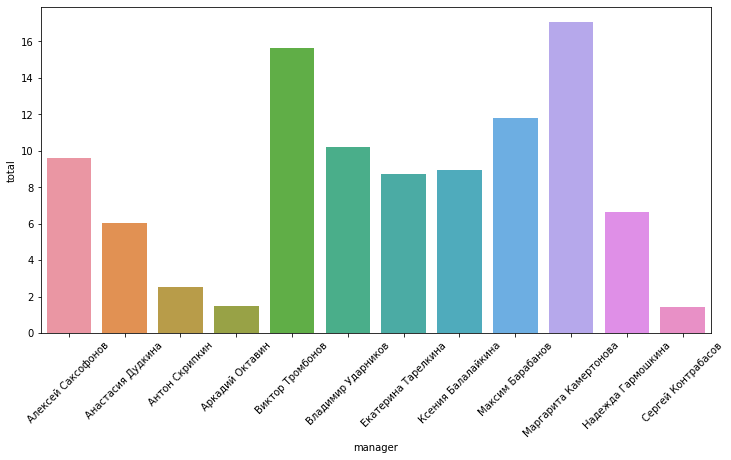

In [91]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data =df_final[['manager', 'total']], x='manager', y='total')
ax.tick_params(axis='x', labelrotation=45)

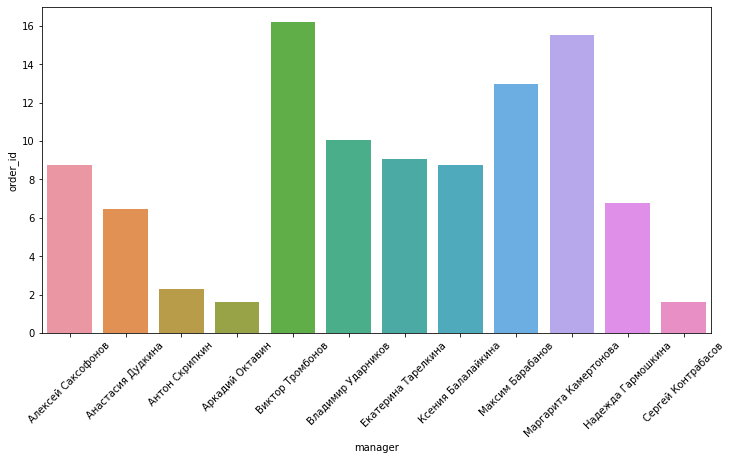

In [92]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data =df_final[['manager', 'order_id']], x='manager', y='order_id')
ax.tick_params(axis='x', labelrotation=45)

В финальном проекте модуля Python вы проанализировали продажи музыкальных товаров: собрали данные, посчитали ключевые метрики в динамике; определили дни, которые выбиваются из общей картины, и выяснили причину этого; нашли наиболее прибыльные бренды и те, которые зря занимают место на виртуальной «полке». Вы проделали отличную работу!

Но если считаете, что можете больше, продолжайте анализ имеющихся данных самостоятельно. Например, посмотрите, в какие дни недели оформляется в среднем больше заказов; составьте более полный отчет по продажам каждого менеджера (учтите отмененные заказы); определите наиболее и наименее популярные/прибыльные категории товаров и т.п. Данные полны инсайтов! Но эти задания не оцениваются и по ним не осуществляется поддержка экспертов. Зато вы можете сделать эту работу своим пет-проектом :)

In [96]:
new_df.date = new_df.date.dt.day_name()

In [97]:
new_df.head()

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category,currency_rate,total
0,QPLK-54839036,489,11,Владимир Ударников,Sunday,52,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,2.902290e+05
1,QPLK-54839036,594,6,Владимир Ударников,Sunday,52,confirmed,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,1.643561e+05
2,QPLK-54839036,670,16,Владимир Ударников,Sunday,52,confirmed,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,1.176358e+06
3,QPLK-54839036,469,9,Владимир Ударников,Sunday,52,confirmed,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,6.725068e+04
4,QPLK-54839036,1302,5,Владимир Ударников,Sunday,52,confirmed,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,8.705580e+04


In [112]:
orders_to_day = new_df.groupby('date', as_index=False) \
    .agg({'order_id': pd.Series.nunique}) \
    .sort_values('order_id', ascending=False) \
    .rename({'date': 'day_name', 'order_id': 'orders'}) \
    .rename(columns={'date': 'day_name', 'order_id': 'orders'})

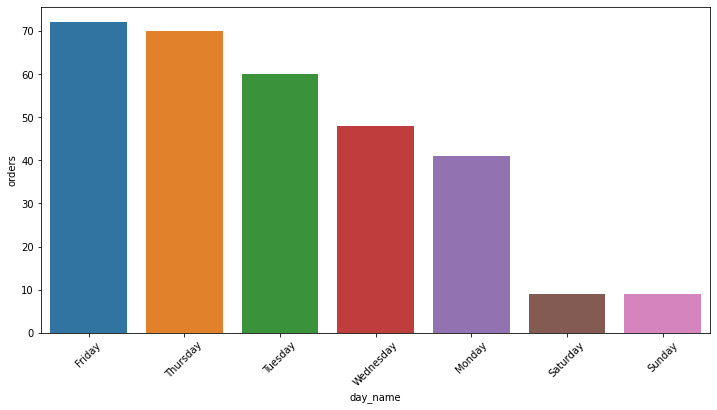

In [114]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data =orders_to_day, x='day_name', y='orders')
ax.tick_params(axis='x', labelrotation=45)

In [119]:
new_df_1 = df_full.merge(currency_rate_data, on='date')
new_df_1['total'] = new_df_1.quantity * new_df_1.price * new_df_1.currency_rate

In [122]:
new_df_1.head()

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category,brand,currency_rate,total
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика,Heco,90.7493,2.902290e+05
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,"JBL, Control 28-1",301.85,Настенная акустика,JBL,90.7493,1.643561e+05
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,"KEF, LSX Wireless",810.17,Беспроводная акустика,KEF,90.7493,1.176358e+06
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,Heco,90.7493,6.725068e+04
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,"Rode, NT1-A",191.86,Конденсаторный микрофон,Rode,90.7493,8.705580e+04


In [125]:
new_df_2 = new_df_1.groupby(['manager', 'status'], as_index=False).agg({'order_id': pd.Series.nunique})
new_df_2

,manager,status,order_id
0,Алексей Саксофонов,canceled,3
1,Алексей Саксофонов,confirmed,27
2,Анастасия Дудкина,canceled,1
3,Анастасия Дудкина,confirmed,20
4,Антон Скрипкин,canceled,1
5,Антон Скрипкин,confirmed,7
6,Аркадий Октавин,confirmed,5
7,Виктор Тромбонов,canceled,5
8,Виктор Тромбонов,confirmed,50
9,Владимир Ударников,canceled,5


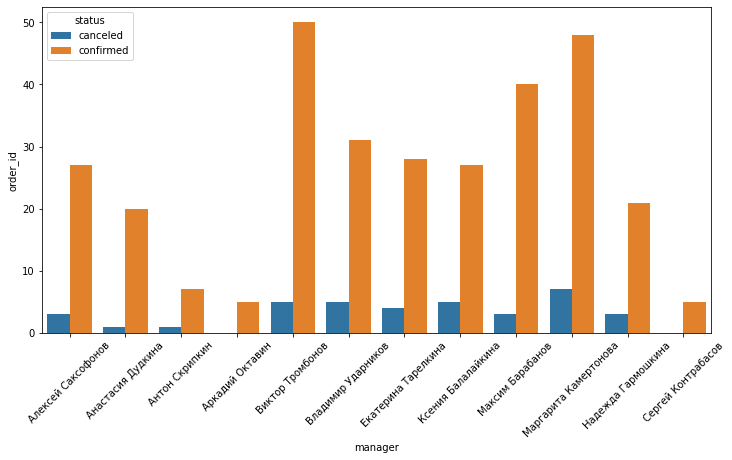

In [126]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data = new_df_2, x='manager', y='order_id', hue='status')
ax.tick_params(axis='x', labelrotation=45)

In [129]:
confirmed_orders_percentage = pd.pivot_table(new_df_2, values='order_id', index='manager', columns='status')

In [132]:
confirmed_orders_percentage = confirmed_orders_percentage.fillna(0).reset_index()
confirmed_orders_percentage

status,manager,canceled,confirmed
0,Алексей Саксофонов,3.0,27.0
1,Анастасия Дудкина,1.0,20.0
2,Антон Скрипкин,1.0,7.0
3,Аркадий Октавин,0.0,5.0
4,Виктор Тромбонов,5.0,50.0
5,Владимир Ударников,5.0,31.0
6,Екатерина Тарелкина,4.0,28.0
7,Ксения Балалайкина,5.0,27.0
8,Максим Барабанов,3.0,40.0
9,Маргарита Камертонова,7.0,48.0


In [133]:
confirmed_orders_percentage['percentage_to_confirmed'] = round((confirmed_orders_percentage.confirmed / (confirmed_orders_percentage.confirmed + confirmed_orders_percentage.canceled)) * 100, 2)

In [134]:
confirmed_orders_percentage

status,manager,canceled,confirmed,percentage_to_confirmed
0,Алексей Саксофонов,3.0,27.0,90.00
1,Анастасия Дудкина,1.0,20.0,95.24
2,Антон Скрипкин,1.0,7.0,87.50
3,Аркадий Октавин,0.0,5.0,100.00
4,Виктор Тромбонов,5.0,50.0,90.91
5,Владимир Ударников,5.0,31.0,86.11
6,Екатерина Тарелкина,4.0,28.0,87.50
7,Ксения Балалайкина,5.0,27.0,84.38
8,Максим Барабанов,3.0,40.0,93.02
9,Маргарита Камертонова,7.0,48.0,87.27


In [137]:
df_5 = confirmed_orders_percentage.query('confirmed > 15')

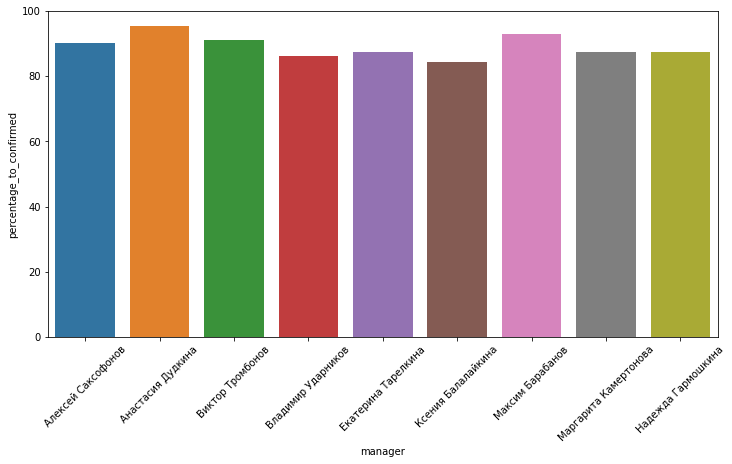

In [138]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data =df_5[['manager', 'percentage_to_confirmed']], x='manager', y='percentage_to_confirmed')
ax.tick_params(axis='x', labelrotation=45)

In [140]:
new_df.category.value_counts()

Беспроводные наушники      401
Полочная акустика          370
Сабвуфер                   312
Напольная акустика         302
Настенная акустика         258
Активные колонки           256
Проводные наушники         256
Саундбар                   227
Умная колонка              202
Наушники с микрофоном      198
Беспроводная акустика      182
Портативная акустика       176
Центральный канал          173
Динамический микрофон       99
Конденсаторный микрофон     96
Домашний кинотеатр          95
Музыкальный центр           93
AV-ресивер                  74
Система караоке             61
Интегральный усилитель      54
Комплекты акустики          52
Виниловый проигрыватель     38
Усилитель мощности          32
Предусилитель               31
AV-процессор                27
Ламповый усилитель          18
Name: category, dtype: int64

In [142]:
new_df.groupby('category', as_index=False) \
    .agg({'total': 'sum'}) \
    .sort_values('total', ascending=False)

,category,total
13,Напольная акустика,3.640961e+08
21,Саундбар,2.245791e+08
20,Сабвуфер,1.958208e+08
16,Полочная акустика,1.688774e+08
2,Активные колонки,1.666976e+08
3,Беспроводная акустика,1.604537e+08
4,Беспроводные наушники,1.378307e+08
23,Умная колонка,1.153225e+08
14,Настенная акустика,8.502613e+07
17,Портативная акустика,7.687226e+07
